### Coursework EMAT30008 2024 ###
Student no: 2113223

## Demos ##

In [1]:
import solvers
import numpy as np
import matplotlib.pyplot as plt
import timeit

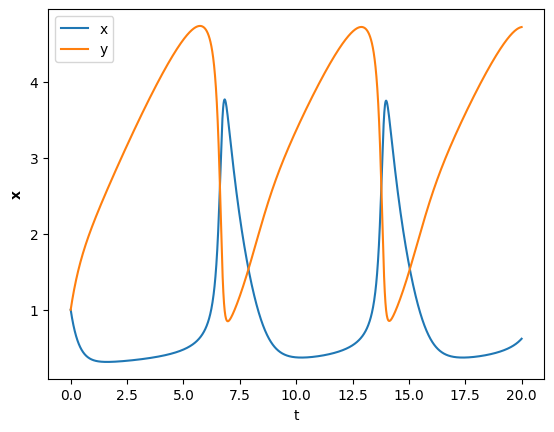

In [2]:
#Question 1
#a)
#Set up the Brusselator system as a function of x (numpy array), t (float) and parameters (numpy array)
def brusselator(x, t, p):
    dx = p[0] + x[0]**2 * x[1] - (p[1] + 1) * x[0]
    dy = p[1] * x[0] - x[0]**2 * x[1]
    return np.array([dx, dy])

#define paramaters A and B and form parameter array p
A = 1
B = 3
p = np.array([A, B])

#Set up the initial conditions
x0 = np.array([1, 1])

#Set up t0 and t_f
t0 = 0
t_f = 20

#Choose the time increment delta_max
delta_max = 1e-2

#Solve system using the RK4 method
x, t = solvers.solve_to(brusselator,p, x0, t0, t_f, delta_max, solver = 'RK4')

#plot the time series of x and y against t
plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.show()


In [3]:
#b)
#From the plot of the time series of x and y against t, we can that the period T of the oscillations is approximately 7.5.
#Thus the initial guess for the period T0 is 7.5
T0 = 7.5

#We will us the shooting method to find the period T of the oscillations
#We will use the default phase condition, i.e. dx/dt = 0 at t = 0

x,T = solvers.shoot_solve(brusselator, p, x0,T0, delta_max, solver = 'RK4')

print(T)

7.156932336553665


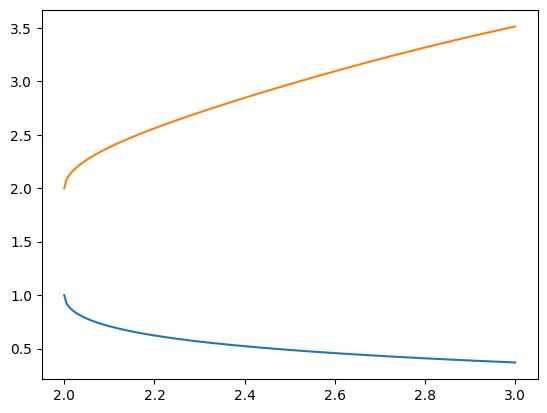

In [4]:
#c)
B0 = 3
Bf = 2
p0 = np.array([A, B0])
pend = np.array([A, Bf])
x = np.array([1,1])
#Use the output of shooting method as first guess for the natural parameter continuation
#We use natural parameter continuation to find the branch of LCs that emerges from the Hopf bifurcation at B = 2
xs, Ts, ps = solvers.natural_p_cont(brusselator, p0, pend, x, LC = True, T0 = T)

plt.figure()
plt.plot(ps[1,:], xs[0,:])
plt.plot(ps[1,:], xs[1,:])
plt.show()

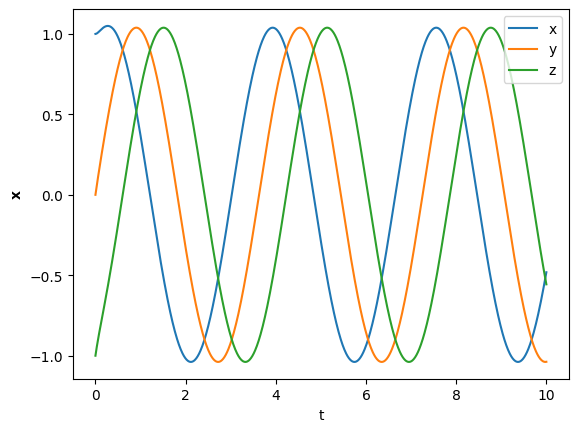

In [5]:
#Question 2
#Set up the extended Hopf Bifurcation normal form
def hopf(x, t, p):
    r_squared = (x**2).sum()
    dx = p[0] * x[0] - x[1] - x[2] + x[0] * r_squared - x[0] * r_squared**2
    dy = x[0] + p[0] * x[1] - x[2] + x[1] * r_squared - x[1] * r_squared**2
    dz = x[0] + x[1] + p[0] * x[2] + x[2] * r_squared - x[2] * r_squared**2
    return np.array([dx, dy, dz])

#a)
beta = 1
t0 = 0
t_f = 10
x0 = np.array([1, 0, -1])
p = np.array([beta])
x, t = solvers.solve_to(hopf, p, x0, t0, t_f, delta_max, solver = 'RK4')

plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.plot(t, x[2, :], label = 'z')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.show()


In [6]:
#b)
# Take initial guess as for the period T as 4 
T0 = 4
#Use the shooting method to find the period T of the oscillations
#Again we use the default phase condition, i.e. dx/dt = 0 at t = 0
x,T = solvers.shoot_solve(hopf, p, x0,T0, delta_max, solver = 'RK4')
print(T,x)

3.627577137448706 [ 1.03769216  0.52182371 -0.51654534]


In [35]:
#c)
beta0 = np.array([1.])

#Use the output of shooting method as first guess for the pseudo-arclength continuation
xs, Ts, ps = solvers.pseudo_arc(hopf,beta0,0,x,T0 = T,max_it = 20 ,innit_h= -1e-1,LC=True)

plt.figure()
plt.plot(ps[0,:],xs[0,:])
plt.xlabel('beta')
plt.ylabel('x', fontweight = 'bold')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Max iterations reached


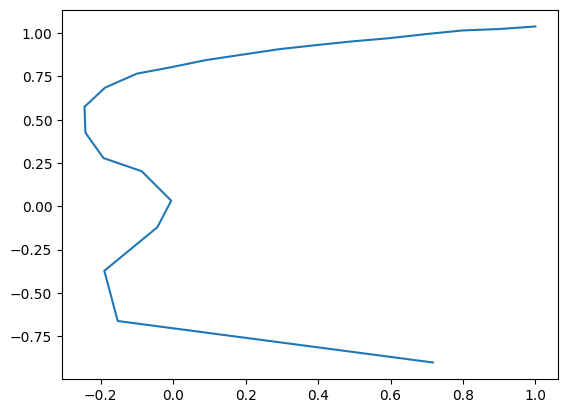

In [126]:
#Excercise 3
#define source term q(x,sig)
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#setup both boundary conditions
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)
D = 1

In [131]:
#a)
N=50
#i)
sig = 0.5
#use numpy linear solver
solver = "solve"
u_np,x = solvers.poisson_solve(bc_left,bc_right,q,sig,N, solver = solver)
print(u_np[25])

-0.6951337539786825


-0.5393579662043892


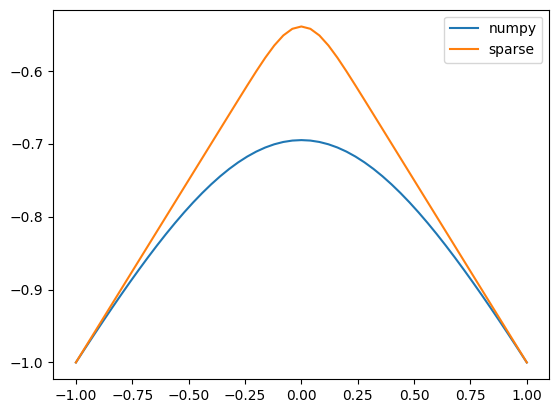

In [133]:
#ii)
sig = 0.1
#use sparse matrix linear solver
solver = "sparse"
u_sparse,x = solvers.poisson_solve(bc_left,bc_right,q,sig,N,D=D, solver = solver)
print(u_sparse[25])
plt.plot(x,u_np,label = "numpy")
plt.plot(x,u_sparse,label = "sparse")
plt.legend()
plt.show()

In [145]:
#b)
setup = """
import solvers
import numpy as np
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#setup both boundary conditions
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)

N = 500
sig = 0.05
"""


timed_code_np = """
solver = "solve"
u,x = solvers.poisson_solve(bc_left,bc_right,q,sig,N, solver = solver)
"""
timed_code_sparse = """
solver = "sparse"
u,x = solvers.poisson_solve(bc_left,bc_right,q,sig,N, solver = solver)
"""

timed_code_thomas = """
solver = "thomas"
u,x = solvers.poisson_solve(bc_left,bc_right,q,sig,N, solver = solver)
"""

time_np = timeit.timeit(setup = setup, stmt = timed_code_np, number = 50)
time_sparse = timeit.timeit(setup = setup, stmt = timed_code_sparse, number = 50)

print("Time taken per iteration for numpy linear solver: ", time_np/50)
print("Time taken per iteration for sparse matrix linear solver: ", time_sparse/50)

Time taken per iteration for numpy linear solver:  0.01462327799992636
Time taken per iteration for sparse matrix linear solver:  0.0007435479993000626
Time taken per iteration for Thomas algorithm:  0.0011463560000993312


Scipy's sparse linear system solver was faster than numpy's dense matrix linear system solver.

In [256]:
#Question 4
#Define problem parameters
D = 0.5
L =2
t0,T = 0, 0.5
N = 100
#define the source term q(x,t) = 0
def q(u,x,t,p):
    return np.zeros(len(x))
bc_left = solvers.Boundary_Condition("Neumann",0,1)
bc_right = solvers.Boundary_Condition("Dirichlet",L,0)

#define initial condition f(x,t0) = u(x,0)
def f(x,t0):
    return  0.5 * x * (L - x)

#Compute discretisation of space
grid = solvers.Grid(N,0,L)
#find maximum step size that can be used for explicit Euler method 
dt_max = grid.dx**2/(2*D)

print("Maximum time step size for explicit Euler method: ", dt_max)

Maximum time step size for explicit Euler method:  0.0004


Value of u(0,T) for explicit Euler method:  -0.2496158000897325
Value of u(0,T) for implicit Euler method:  -0.24960750690779993


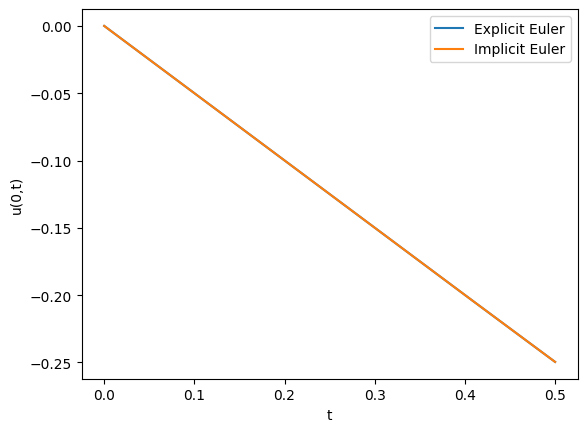

In [257]:
#b)
#solve using Explicit Euler method
dt_explicit = 0.5 * dt_max 
explicit = "RK4"
u_explicit,x,t_explicit = solvers.diffusion_solve(bc_left,bc_right,f,t0,T,q,p = 0,N=N, D = D, dt = dt_explicit,explicit_solver = explicit)

#solve using Implicit Euler method, solving the arising linear system with the sparse matrix solver 
dt_implicit = 2 * dt_max
implicit = "sparse"
u_implicit,x,t_implicit = solvers.diffusion_solve(bc_left,bc_right,f,t0,T,q,p = 0,N=N, D = D, dt = dt_implicit,implicit_solver = implicit)

#print the value of u(0,T) for both methods
print("Value of u(0,T) for explicit Euler method: ", u_explicit[0,-1])
print("Value of u(0,T) for implicit Euler method: ", u_implicit[0,-1])

#plot u(0,t) against t for both methods
plt.figure()
plt.plot(t_explicit,u_explicit[0,:], label = "Explicit Euler")
plt.plot(t_implicit,u_implicit[0,:], label = "Implicit Euler")
plt.xlabel('t')
plt.ylabel('u(0,t)')
plt.legend()
plt.show()

In [52]:
#Question 5)
#Define the parameters of the problem
D = 0.01
L = 6
T = 100
bc_left = solvers.Boundary_Condition("Neumann",0,0)
bc_right = solvers.Boundary_Condition("Neumann",L,0)

#a) Solving this problem using the implicit Euler method
#Solving the linear system that arises using thomas algorithm
solver_implicit = "thomas"
#Define the source term q(u,x,t,p)
def q(u,x,t,p):
    return (1-u)**2 * np.exp(-x)

def f(x,t0):
    return np.zeros(len(x))

N = 600

us,xs,ts = solvers.diffusion_solve(bc_left, bc_right, f,0,T, q , p, N, D = D,implicit_solver = "solve", dt = 0.5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


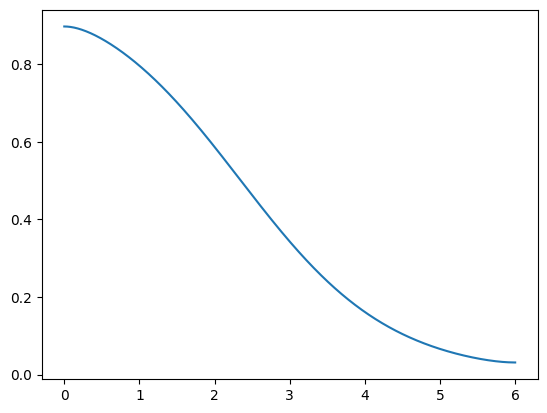

In [50]:
plt.plot(xs,us[:,-1])

In [236]:
u_explicit.shape

(11, 26)